### About: 

4/9/2021
Program converts final_general.col and final_general.dat into columns then preprocess to graph a correlation heat map

------------------------------------------------------------------------------
### Note:
This is just the correlation within 1 dataset, we might want to expand this for correlation with other dataset

@Author: Minh Nguyen @AIA

@Credit: Andrei @AIA

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

### Preprocessing

In [2]:
!ls

Correlation Analysis for UCI (Way 2) - Internet Usasge (1999).ipynb
final_general.col
final_general.dat


In [3]:
# Check number of character in 1 row of the dataset
len(np.array(pd.read_fwf("final_general.dat"))[0][0].split(' '))

72

In [4]:
def parse_data(str, num_col=69):
    """ Convert .txt file of feature space into a pandas csv file """
    data = np.array(pd.read_fwf(str))
    observations = [[]]*len(data)
    for i, x in enumerate(data):
        x = x[0].split(' ')
        features = [None]*num_col
        for j, val in enumerate(x):
            if val and val.isdigit() and j < num_col:
                features[j] = int(val)
        observations[i] = features
    return np.array(observations)

In [5]:
x = "final_general.dat"
data = parse_data(x)
data = [[item for item in row] for row in data]

In [6]:
column_names = np.array(pd.read_fwf("final_general.col")).T[0] #T = Transpose dimension (this case dimension 1)

In [7]:
df = pd.DataFrame(data, columns = column_names)

In [8]:
df.head()

,Age,Community Building,Community Membership_Family,Community Membership_Hobbies,Community Membership_None,Community Membership_Other,Community Membership_Political,Community Membership_Professional,Community Membership_Religious,Community Membership_Support,...,Web Ordering,Web Page Creation,Who Pays for Access_Don't Know,Who Pays for Access_Other,Who Pays for Access_Parents,Who Pays for Access_School,Who Pays for Access_Self,Who Pays for Access_Work,Willingness to Pay Fees,Years on Internet
0,2,28,2,0,0,0,0,0,0,0,...,1,1,1,2,0,0,0,0.0,1.0,0.0
1,99,25,0,1,1,0,0,0,1,0,...,2,1,1,1,0,0,0,0.0,1.0,1.0
2,29,28,0,0,0,0,1,0,0,0,...,1,1,1,1,0,0,0,0.0,1.0,0.0
3,15,17,0,0,0,0,0,1,1,0,...,2,1,1,1,0,0,0,0.0,1.0,0.0
4,99,55,2,1,0,0,0,0,1,1,...,1,1,1,1,0,0,0,0.0,1.0,1.0


### Correlation Calculation

In [9]:
def correlation_cal(df):
    # Instead of just dropping the missing values, we will fill in N/A values
    if df.isna().values.any():
        while True:
            missing_type = input("Please enter the type of missnig value replacement: mean, medium, mode, or drop from the row")
            missing_type = missing_type.lower()
            if(missing_type in ['mean', 'median', 'mode', 'drop']):
                if(missing_type == 'mean'):
                    df.fillna(df.mean(), inplace=True)
                elif(missing_type == 'median'):
                    df.fillna(df.median(), inplace=True)
                elif(missing_type == 'mode'):
                    df.fillna(df.mode(), inplace=True)
                else:
                    df.dropna()
                break
            else:
                print("Please input the option from the list")
    
    # Calculate input data correlation
    while True:
        corr_type = input("Please enter type of correlation: Pearson, Spearman, or Kendall: ")
        corr_type = corr_type.lower()
        if corr_type in ['pearson', 'spearman', 'kendall']:
            break
        else:
            print("Please try again")
    
    # Plot correlation matrix
    corrMatrix = df.corr(method=corr_type)
    _, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corrMatrix, ax = ax, cmap="gray", linewidths = 0.1) # cmap can also be "YlGnBu"

### Run 1: Correlation Pearson - Mean

Please enter the type of missnig value replacement: mean, medium, mode, or drop from the rowmean
Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


C:\Users\nguye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nguye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


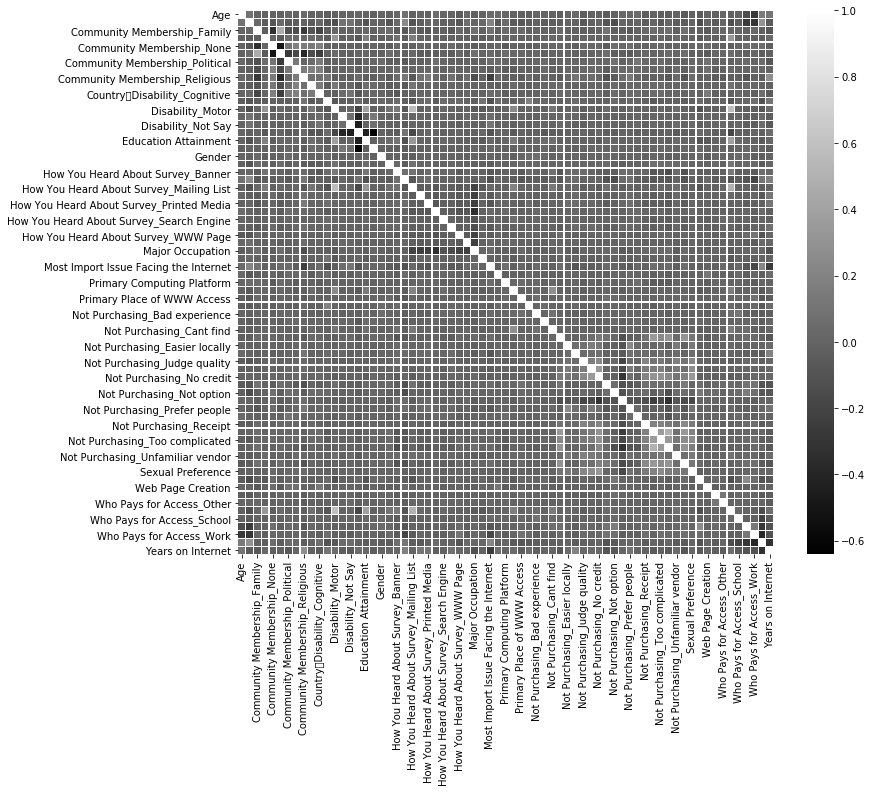

In [10]:
# Run Correlation Pearson
correlation_cal(df)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


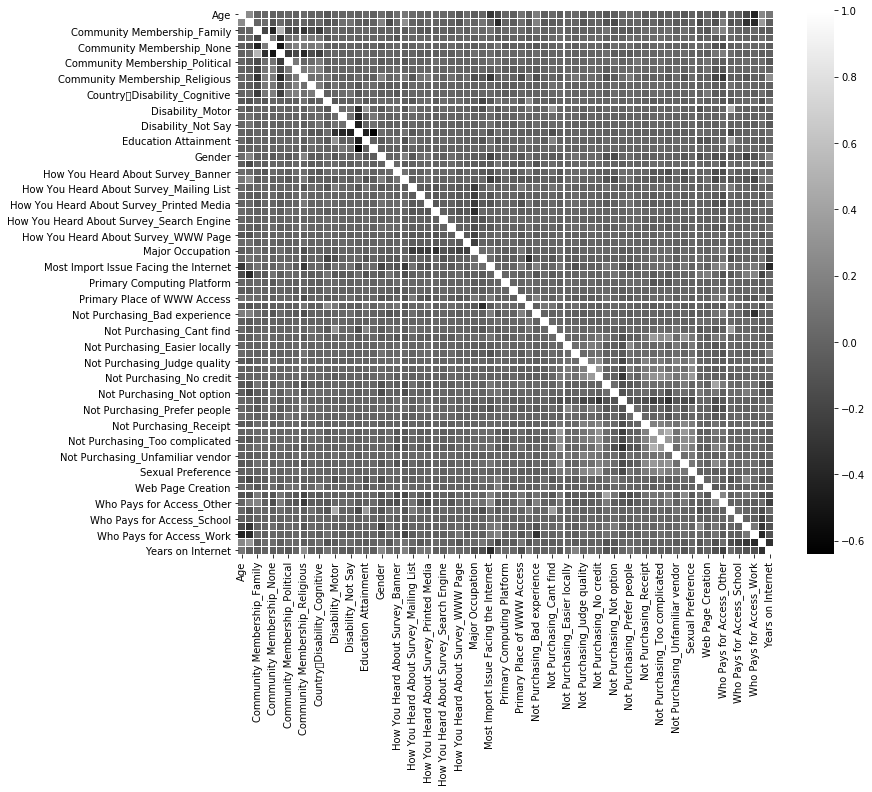

In [11]:
# Run Correlation Spearman
correlation_cal(df)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


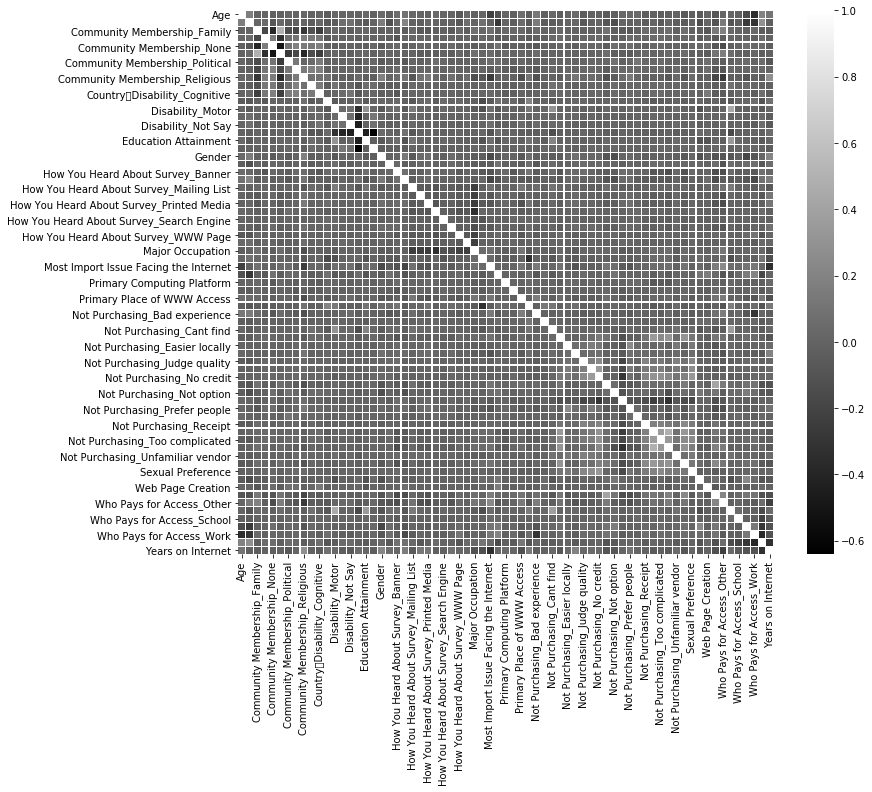

In [12]:
# Run Correlation Kendall
correlation_cal(df)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?